importing lemmatized data and merging titles and description together

In [43]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import nltk
nltk.download('wordnet')
import pandas as pd;
df=pd.read_excel("merged_file.xlsx")
title_list=df["title_en"]
description_list=df["description_en"]
description_titles = list(str(sub1)+" " + str(sub2) for sub1, sub2 in zip(title_list, description_list))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ckulshre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocess these descriptions by below steps:

1.   Lower Casing All Descriptions.
2.   Tokenizing.
3.   Removing tokens with length < 2 and removing stop words.
4.   Lemmatizing the tokens

In [44]:
#TOKENIZING data & REMOVING STOP WORDS along with few common words
import nltk
nltk.download('stopwords')
stop_words=nltk.corpus.stopwords.words('english')
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemmatized_descriptions=[]
for desc_title in description_titles:
    desc_title=desc_title.lower()
    token_create=tokenizer.tokenize(desc_title)
    #REMOVING TOKENS HAVING LEN<2 FOLLOWED BY LEMMATIZATION
    tmp = []
    for i in token_create:
       
        if len(i)>2 and (i not in stop_words) and i !="get" and i !="learning" and i !="using" and i !="use"  and i !="also" and i !="course" and i !="class" and i !="part" and i !="video" and i !="form" and i != "learn":

            tmp.append(lemmatizer.lemmatize(i))
        
     
    lemmatized_descriptions.append(tmp)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ckulshre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Above is the list of Processed tokens for each descriptions.
Lets Calculate & Plot Frequency distributions for the top tokens.

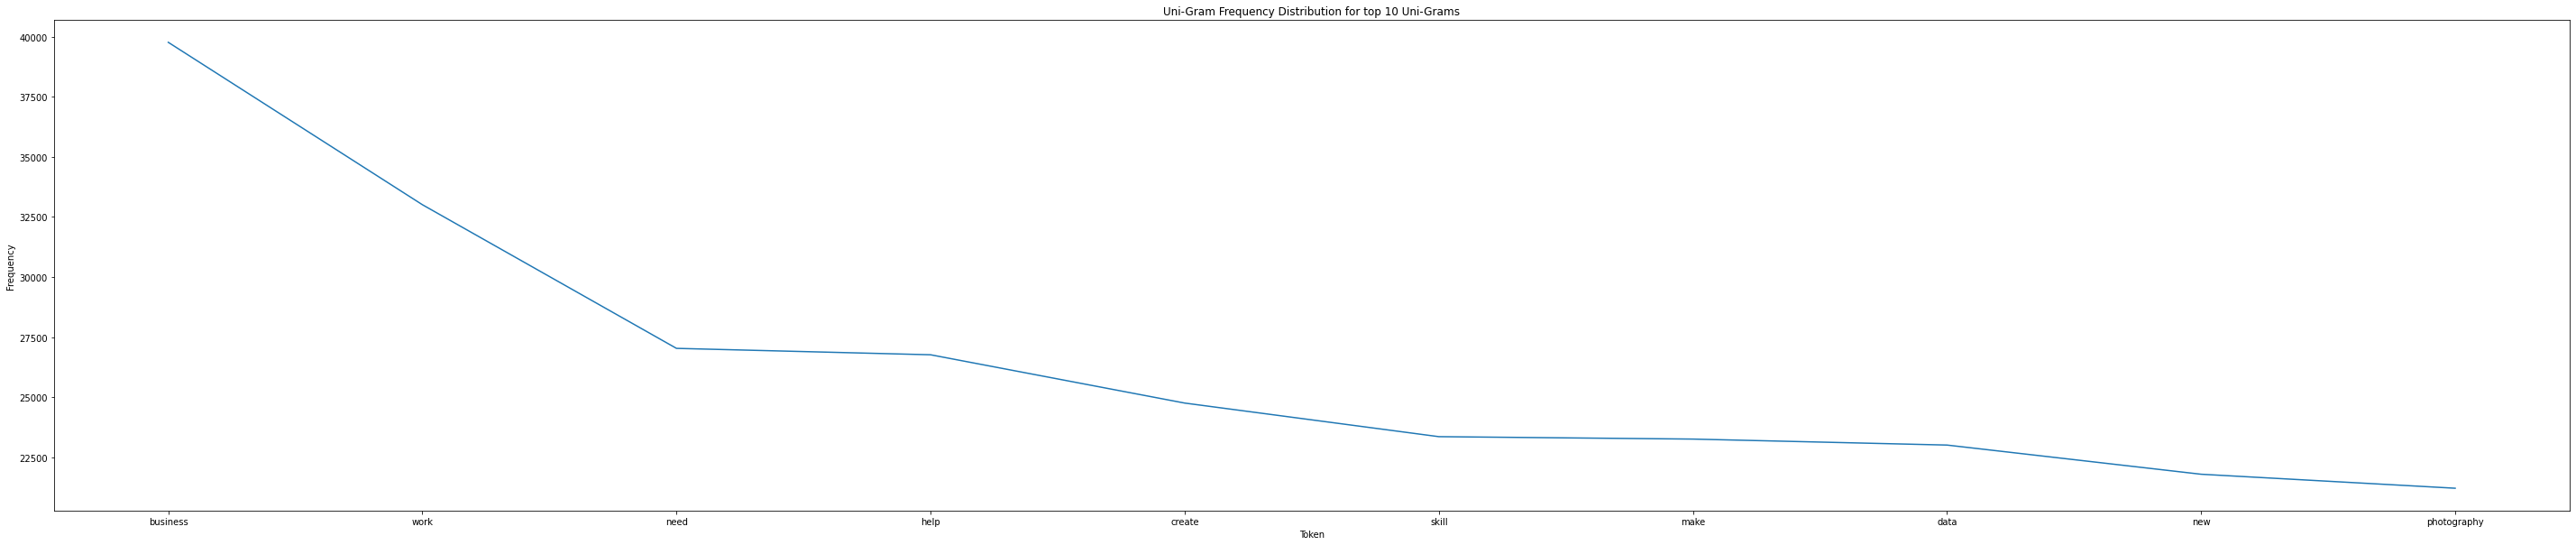

In [45]:
#TOKEN FREQUENCY DISTRIBUTION
from matplotlib import pyplot as plt;
li=[]
for i in lemmatized_descriptions:
 for j in i:
   li.append(j)
fdist = nltk.FreqDist(li).most_common(10)
X=[]
Y=[]
for x,y in fdist:
  X.append(x)
  Y.append(y)

plt.title("Uni-Gram Frequency Distribution for top 10 Uni-Grams")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.rcParams["figure.figsize"] = (50,10)
plt.plot(X,Y)

Let's now calculate bi-grams

In [46]:
#BI-GRAM
from nltk import ngrams
lemmatized_descriptions_n_grams=[]
li_bigrams=[]
for i in lemmatized_descriptions:
  bigram=list(ngrams(i,2))
  for b in bigram:
    tmp=""
    for k in b:
     tmp=tmp+k+"_"
    i.append(tmp[:-1])
    li_bigrams.append(tmp[:-1])
  lemmatized_descriptions_n_grams.append(i)


Plotting Bi-Grams

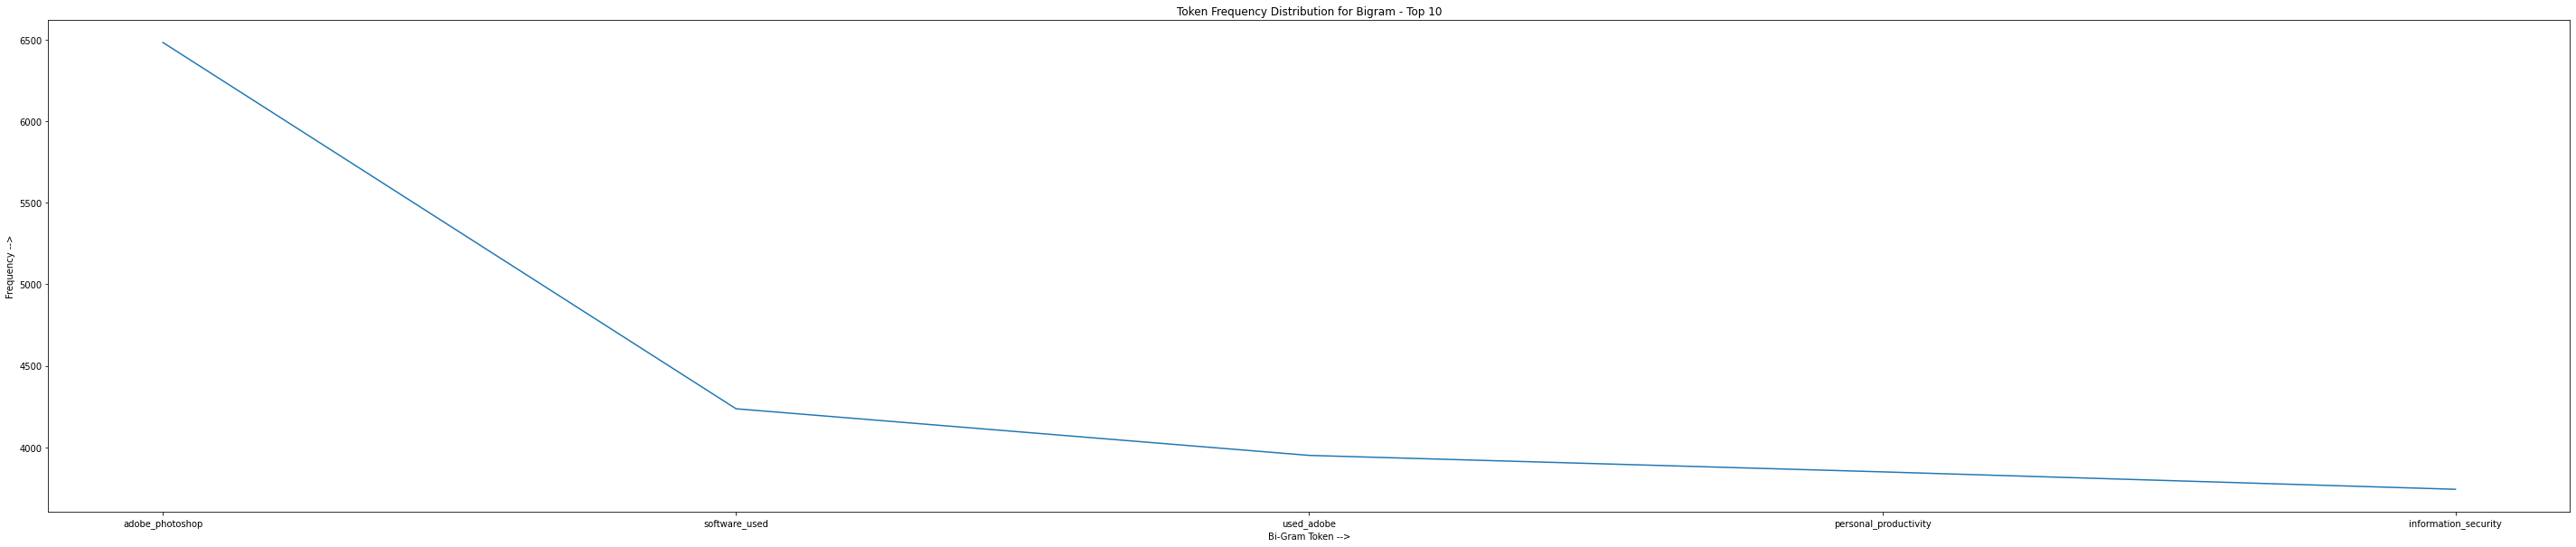

In [17]:
#TOKEN FREQUENCY DISTRIBUTION for BIGRAM
fdist = nltk.FreqDist(li_bigrams)
fdist=fdist.most_common(5)
X=[]
Y=[]
for i,j in fdist:
  X.append(i)
  Y.append(j)
  
plt.title("Token Frequency Distribution for Bigram - Top 10")
plt.xlabel("Bi-Gram Token -->")
plt.ylabel("Frequency -->")
plt.rcParams["figure.figsize"] = (50,10)
plt.plot(X,Y)

Let's combine Uni-Grams, Bi-Grams and now calculate Frequency Distribution for most common 10 Tokens. 

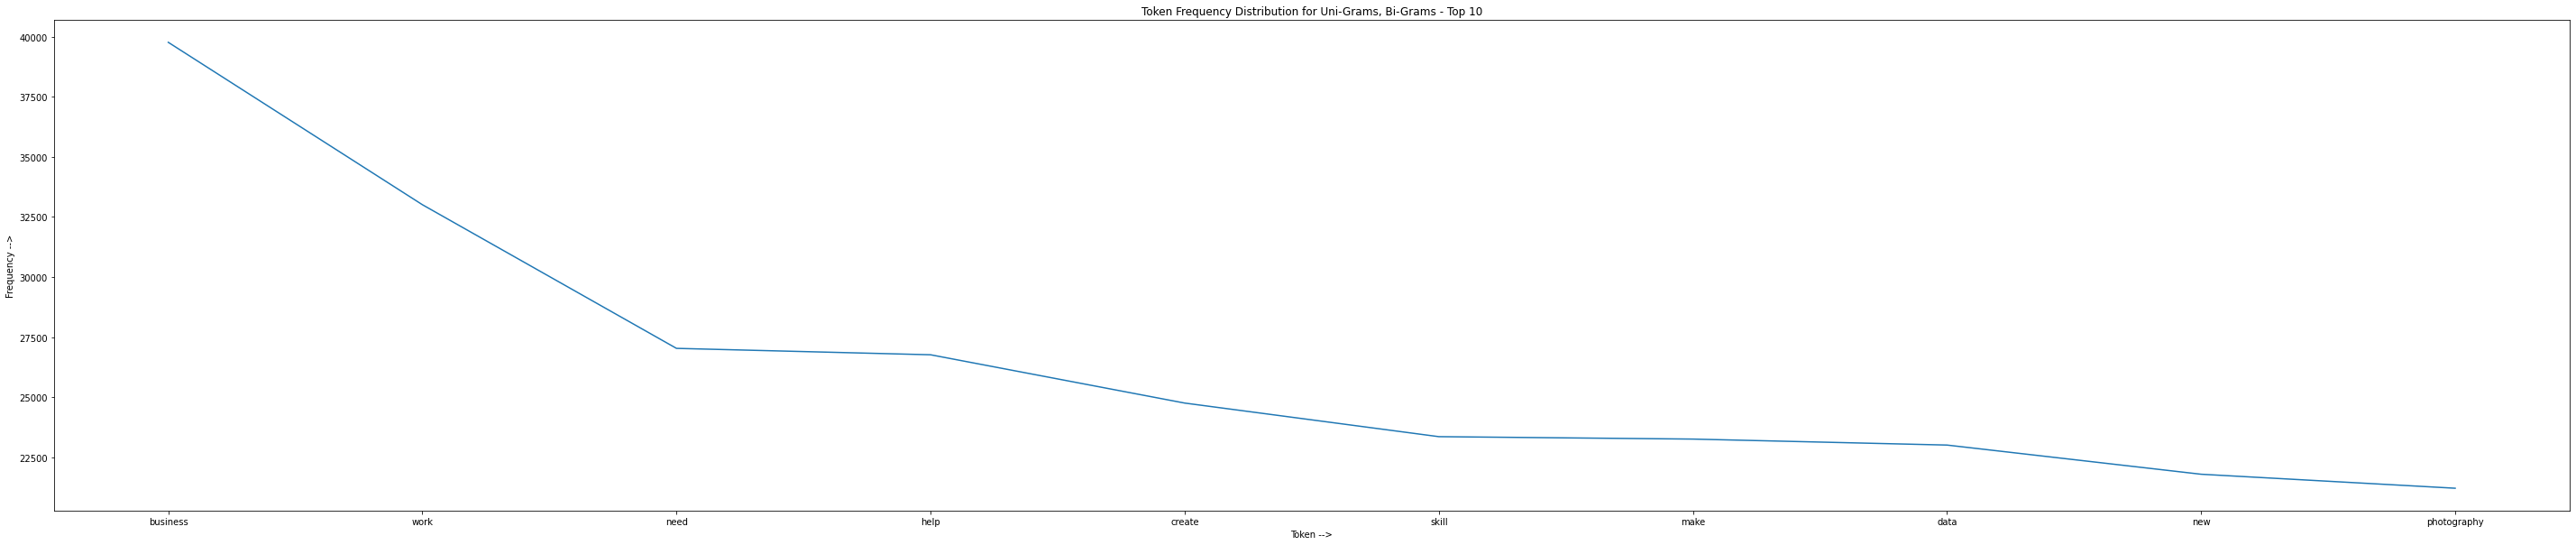

In [47]:
#TOKEN FREQUENCY DISTRIBUTION
li=[]
for i in lemmatized_descriptions_n_grams:
 for j in i:
   li.append(j)
fdist = nltk.FreqDist(li).most_common(10)
X=[]
Y=[]
for x,y in fdist:
  X.append(x)
  Y.append(y)

plt.title("Token Frequency Distribution for Uni-Grams, Bi-Grams - Top 10")
plt.xlabel("Token -->")
plt.ylabel("Frequency -->")
plt.rcParams["figure.figsize"] = (50,10)
plt.plot(X,Y)

Let's Model the data Using LDA (Latent Dirichlet Allocation) & also calculate Avg. Topic Coherence & top Topics identified. 

In [32]:
from gensim.corpora import Dictionary


dictionary = Dictionary(lemmatized_descriptions_n_grams)

corpus = [dictionary.doc2bow(token) for token in lemmatized_descriptions_n_grams]
from gensim.models import LdaModel

temp = dictionary[0]  
id2word = dictionary.id2token
num_topics=20

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=10000,
    alpha='auto',
    eta='auto',
    iterations=5,
    num_topics=num_topics,
    passes=5,
    random_state=123
)
top_topics = model.top_topics(corpus)

#saving model to disk.
from gensim.test.utils import datapath
save_file_path = datapath("D:/Recommendation_Engine/lda_model")

model.save(save_file_path)
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

topics = model.print_topics(num_words=6)
print("Prinitng Topics")
for topic in topics:
    print(topic)

2022-12-04 21:35:33,988 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-12-04 21:35:35,710 : INFO : adding document #10000 to Dictionary<246423 unique tokens: ['bug', 'bug_continue', 'consequence', 'consequence_remember', 'continue']...>
2022-12-04 21:35:37,554 : INFO : adding document #20000 to Dictionary<386742 unique tokens: ['bug', 'bug_continue', 'consequence', 'consequence_remember', 'continue']...>
2022-12-04 21:35:39,580 : INFO : adding document #30000 to Dictionary<507779 unique tokens: ['bug', 'bug_continue', 'consequence', 'consequence_remember', 'continue']...>
2022-12-04 21:35:41,300 : INFO : adding document #40000 to Dictionary<609291 unique tokens: ['bug', 'bug_continue', 'consequence', 'consequence_remember', 'continue']...>
2022-12-04 21:35:43,078 : INFO : adding document #50000 to Dictionary<704717 unique tokens: ['bug', 'bug_continue', 'consequence', 'consequence_remember', 'continue']...>
2022-12-04 21:35:44,875 : INFO : adding document #60000 to

Average topic coherence: -2.3847.


2022-12-04 21:40:28,610 : INFO : topic #13 (0.110): 0.024*"adobe" + 0.019*"photoshop" + 0.015*"image" + 0.011*"adobe_photoshop" + 0.008*"software" + 0.007*"used"
2022-12-04 21:40:28,622 : INFO : topic #14 (0.088): 0.005*"storytelling" + 0.004*"photography" + 0.004*"business" + 0.004*"art" + 0.004*"technique" + 0.004*"work"
2022-12-04 21:40:28,635 : INFO : topic #15 (0.080): 0.008*"network" + 0.007*"organization" + 0.007*"candidate" + 0.006*"security" + 0.006*"threat" + 0.005*"response"
2022-12-04 21:40:28,646 : INFO : topic #16 (0.090): 0.014*"wedding" + 0.012*"business" + 0.010*"photography" + 0.005*"photographer" + 0.005*"client" + 0.005*"marketing"
2022-12-04 21:40:28,655 : INFO : topic #17 (0.210): 0.017*"data" + 0.015*"customer" + 0.013*"business" + 0.007*"product" + 0.007*"sale" + 0.005*"excel"
2022-12-04 21:40:28,667 : INFO : topic #18 (0.080): 0.004*"language" + 0.004*"devops" + 0.004*"describe" + 0.004*"practice" + 0.003*"type" + 0.003*"work"
2022-12-04 21:40:28,679 : INFO : t

Prinitng Topics
(0, '0.014*"application" + 0.010*"programming" + 0.009*"web" + 0.009*"form" + 0.008*"build" + 0.007*"developer"')
(1, '0.017*"camera" + 0.008*"john" + 0.007*"photographer" + 0.007*"start" + 0.007*"fast" + 0.007*"photography"')
(2, '0.004*"want" + 0.003*"business" + 0.003*"government" + 0.003*"material" + 0.002*"work" + 0.002*"finance"')
(3, '0.013*"demo" + 0.010*"introduction" + 0.009*"application" + 0.008*"summary" + 0.006*"cloud" + 0.006*"minute"')
(4, '0.019*"project" + 0.013*"design" + 0.008*"management" + 0.005*"illustrator" + 0.004*"change" + 0.004*"graphic"')
(5, '0.016*"light" + 0.014*"lighting" + 0.013*"photography" + 0.011*"photographer" + 0.010*"portrait" + 0.007*"shoot"')
(6, '0.029*"security" + 0.017*"information" + 0.011*"information_security" + 0.011*"certification" + 0.009*"certified" + 0.008*"candidate"')
(7, '0.011*"network" + 0.010*"wireless" + 0.009*"cwna" + 0.007*"topic" + 0.006*"wireless_network" + 0.005*"required"')
(8, '0.007*"harassment" + 0.006

We can see that we have got topics in format 
(0, '0.012*"abc" + 0.010*"xyz" + 0.007*"pqr"+0.11*"qwe"+0.12*"rty"+0.04*"poi").
It shows top 6 keywords contributing to Topic 1 are abc, xyz, pqr,qwe, rty,poi. The associated weights shows how important a keyword is for the topic.

In [42]:
import re;
from gensim.test.utils import datapath
import numpy as np
from googletrans import Translator
from gensim import  models
load_model = datapath("D:/Recommendation_Engine/lda_model")
model = models.ldamodel.LdaModel.load(load_model)
title_test_string="Organizing Memorabilia (Scrapbooking with Project Life)"
description_test_string="<p>Preserving your best memories doesnâ€™t need to keep you from making new ones! Join memory keeping maven Becky Higgins for a class on her famous <b>Project LifeÂ® scrapbooking system</b>.</p><p>Chronicling a good life doesnâ€™t require endless weekend hours glued to your glue stick. Becky will show you how to efficiently create one-of-a-kind scrapbooks using a simple method that preserves your memories and reflects your personal style. In this class, Becky will teach you her back-to-basics approach to memory keeping. Sheâ€™ll cover organizing your photos, designing a timeless scrapbook and everything in between. You will learn how to select and compile your photos so your scrapbooks tell the story you want future generations to remember.</p><p>Whether you want to commemorate a major life event, document a trip, or start an ongoing scrapbooking project, this class will show you how to turn your big moments - as well as your everyday, seemingly mundane but equally important moments - into beautiful memories.</p>"


test_string=title_test_string+" "+description_test_string;
test_string=re.sub(r"<[^<>]*>", "", test_string)
test_string=test_string.replace("??",'')
test_string=test_string.replace("..",'')
test_string=test_string.replace("||",'')
translator = Translator()
test_string=translator.translate(test_string, dest='en').text

test_topic=[]
test_string=test_string.lower()
token_create=tokenizer.tokenize(test_string)
#REMOVING TOKENS HAVING LEN<2 FOLLOWED BY LEMMATIZATION

for i in token_create:
        if len(i)>2 and (i not in stop_words) and i !="get" and i !="learning" and i !="using" and i !="use" and i !="create" and i !="make" and i !="also" and i !="course" and i !="class" and i !="part" and i !="video" and i !="form" and i != "learn":

            test_topic.append(lemmatizer.lemmatize(i))

    
dataset = [d.split() for d in test_topic]            
dictionary_test = Dictionary(dataset)
test_corpus = [dictionary_test.doc2bow(token) for token in dataset]
max_val=0
key=0;
for i in model.get_document_topics(test_corpus):
    for j in i: 
      if j[1] > max_val:
        max_val=j[1]
        key=j[0]
print("The given string matches closely with topic :: "+ str(key))
#for above predicted topics taking out topics from topic file
df=pd.read_csv("ML - Topic Prediction\\topics.csv")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
for i in (topics[key][1].split("\"")):
    if re.search('[a-zA-Z]+',i):
        matched_cols.append(list(df[df['topic'].str.match(i)]['topic']))
li=[]
for j in (matched_cols):
    if len(j)!=0:
        for k in j:
            if k !='business skills' and k !='business strategy' and k !='business writing' and k != 'business operations' and k !='business ethics':
              li.append(k.capitalize())
print([*set(li)])

2022-12-04 22:08:06,929 : INFO : loading LdaModel object from D:/Recommendation_Engine/lda_model
2022-12-04 22:08:06,932 : INFO : loading expElogbeta from D:/Recommendation_Engine/lda_model.expElogbeta.npy with mmap=None
2022-12-04 22:08:06,966 : INFO : setting ignored attribute dispatcher to None
2022-12-04 22:08:06,966 : INFO : setting ignored attribute id2word to None
2022-12-04 22:08:06,966 : INFO : setting ignored attribute state to None
2022-12-04 22:08:06,968 : INFO : LdaModel lifecycle event {'fname': 'D:/Recommendation_Engine/lda_model', 'datetime': '2022-12-04T22:08:06.968834', 'gensim': '4.2.0', 'python': '3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'loaded'}
2022-12-04 22:08:06,968 : INFO : loading LdaState object from D:/Recommendation_Engine/lda_model.state
2022-12-04 22:08:06,971 : INFO : loading sstats from D:/Recommendation_Engine/lda_model.state.sstats.npy with mmap=None
2022-12-04 

The given string matches closely with topic :: 11
['Team building & teamwork', 'People and communication skills']
